Read the dataset 

In [35]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
df = pd.read_table("shhs1.txt")
df.head(4)

,pptid,waist,COPD15,ASTHMA15,slp_lat,time_bed,timest1p,timest2p,times34p,timeremp,rdi4p,StLOutP,StOnsetP,SlpPrdP,Staging1,Staging2,Staging3,Staging4,Staging5,RestAn1,RestAn2,RestAn3,RestAn4,HTNDerv_s1,shhs1_tcvd,gender,age_s1,smokstat_s1,WASO,bmi_s1
0,1,86.0,0.0,0.0,NaN,440.5,6.258322,60.852196,19.307590,13.581891,1.438083,28,28,375.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0,1,55,2.0,65.0,21.777553
1,2,107.0,0.0,0.0,NaN,225.0,0.824176,65.659340,16.758242,16.758242,17.802198,0,0,182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,78,0.0,43.0,32.950680
2,3,82.0,0.0,0.0,NaN,431.5,4.881451,40.306835,42.817295,11.994421,4.853556,167,167,358.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,77,0.0,73.0,24.114150
3,4,85.0,0.0,0.0,14.0,358.5,2.990033,29.401993,52.325581,15.282393,0.797342,54,82,301.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,1,48,0.0,43.5,20.185185


Add a new variable called rdi4p2 equal to log(rdi4p + 1)

In [0]:
df = df.assign(rdi4p2 = np.log(df.rdi4p + 1))

Build the linear model, and the coefficient for BMI is 0.0765

In [37]:
fit = smf.ols('rdi4p2 ~ bmi_s1', data = df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rdi4p2   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     898.9
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          1.20e-183
Time:                        22:03:43   Log-Likelihood:                -8087.1
No. Observations:                5761   AIC:                         1.618e+04
Df Residuals:                    5759   BIC:                         1.619e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4630      0.073     -6.342      0.000      -0.606      -0.320
bmi_s1         0.0765      0.003     29.981      0.000       0.071       0.081
==============================================================================
Omnibus:                      196.973   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.707
Skew:                           0.290   Prob(JB):                     3.78e-32
Kurtosis:                       2.485   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Below is the scatterplot

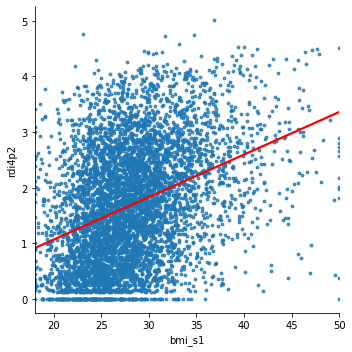

In [53]:
sns.lmplot(x = "bmi_s1", y= "rdi4p2", data=df, ci=None,scatter_kws={"s": 8},line_kws={'color': 'red'})

Next, we predict rdi4p for a person with bmi = 30.  The predicted log(rdi4p + 1) is 1.83 and predicted rdi4p is 5.24.

In [60]:
newbmi = {'bmi_s1':[30]}
p=fit.predict(newbmi)
print(p)
np.exp(p)-1

0    1.831538
dtype: float64


0    5.243484
dtype: float64